              Year  Global Temperature Anomalies  Nino 1+2 SST  \
count   882.000000                    882.000000    498.000000   
mean   1986.251701                      0.337971     23.250542   
std      21.230643                      0.345478      2.328832   
min    1950.000000                     -0.370000     19.060000   
25%    1968.000000                      0.060000     21.220000   
50%    1986.000000                      0.300000     23.140000   
75%    2005.000000                      0.610000     25.230000   
max    2023.000000                      1.340000     28.510000   

       Nino 1+2 SST Anomalies  Nino 3 SST  Nino 3 SST Anomalies  Nino 3.4 SST  \
count              498.000000  498.000000            498.000000    498.000000   
mean                -0.049859   25.967731             -0.065743     27.016325   
std                  1.046806    1.233975              0.853805      0.945222   
min                 -1.900000   23.380000             -2.160000     24.560000   


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


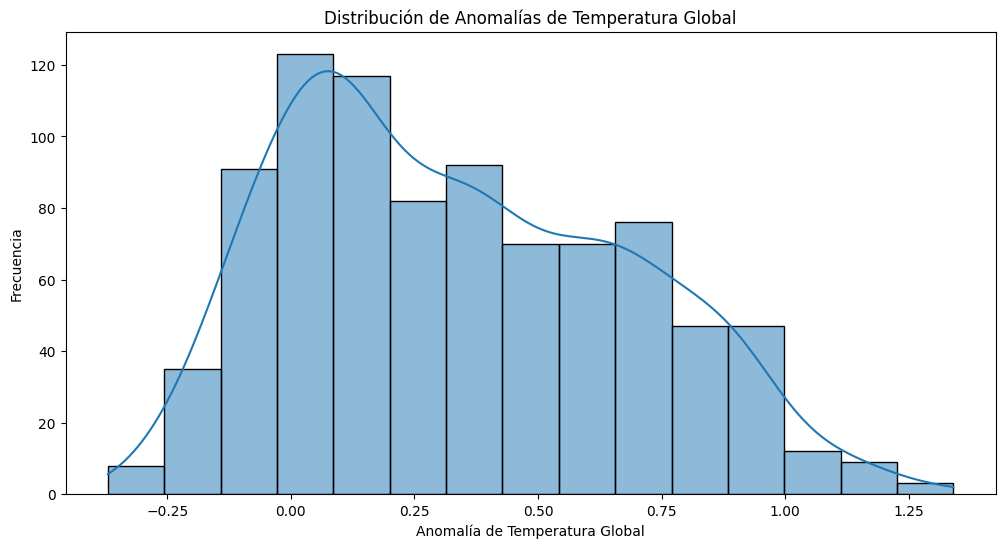

Datos faltantes por columna:
 Date                              0
Year                              0
Month                             0
Global Temperature Anomalies      0
Nino 1+2 SST                    384
Nino 1+2 SST Anomalies          384
Nino 3 SST                      384
Nino 3 SST Anomalies            384
Nino 3.4 SST                    384
Nino 3.4 SST Anomalies          384
Nino 4 SST                      384
Nino 4 SST Anomalies            384
TNI                               7
PNA                               0
OLR                             308
SOI                              12
Season (2-Month)                  0
MEI.v2                          348
Season (3-Month)                  0
ONI                               0
Season (12-Month)                 0
ENSO Phase-Intensity              6
dtype: int64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


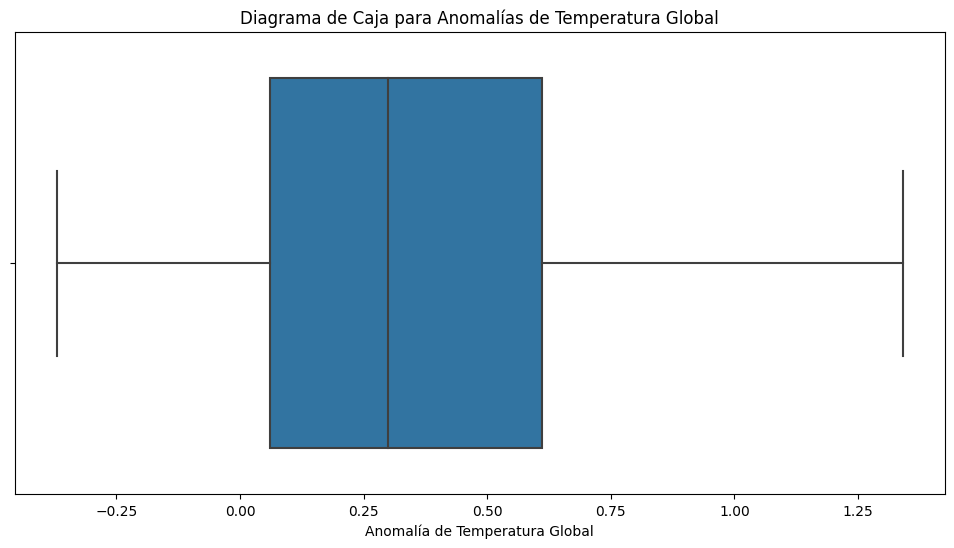

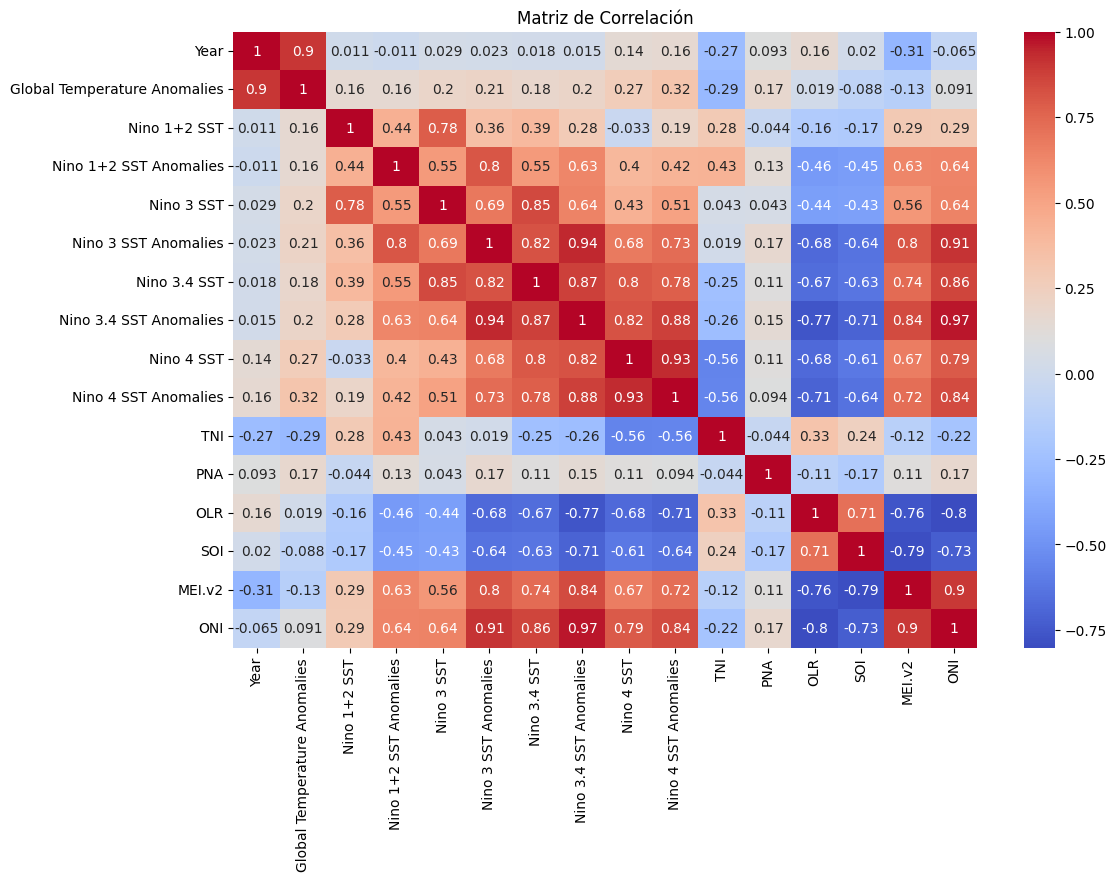

In [6]:
#Librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Cargamos los datos
data = pd.read_csv("/Volumes/KINGSTON/Data Science Project/ENSO.csv")

#Vemos las estadísticas básicas
print(data.describe())

#Creamos una gráfica de barras
plt.figure(figsize=(12, 6)) #Establecemos el tamaño
#Seleccionamos la variable y damos "True" a la densidad del kernel
sns.histplot(data["Global Temperature Anomalies"], kde=True)
#Labels
plt.title("Distribución de Anomalías de Temperatura Global")
plt.xlabel("Anomalía de Temperatura Global")
plt.ylabel("Frecuencia")
plt.show() #Mostramos

#Vemos los datos faltantes
missing_data = data.isnull().sum()
print("Datos faltantes por columna:\n", missing_data)

#Identificams valores atípicos
plt.figure(figsize=(12, 6))
sns.boxplot(x=data["Global Temperature Anomalies"])
plt.title("Diagrama de Caja para Anomalías de Temperatura Global")
plt.xlabel("Anomalía de Temperatura Global")
plt.show()

#Las columnas no numéricas no las tomamos en cuenta
data = data.select_dtypes(include=['number'])

#Matríz de Correlación
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

Como podemos ver el en resultado de este primer código: 
- En la primera parte al entregarnos los valores estadísticos básicos, vemos elementos interesantes, como los mínimos, los máximos, las médias de cada columna.
- En el segundo vemos la distribución de los valores de la columna "Global Temperature Anomalies", que a mi consideración, es el resultado final de cálculos previos, esta puede ser una buena variable a tomar en cuenta.
- El tercero nos muestra los datos faltantes que tiene cada columna, si hay varios a considerar, por lo que se debe hacer algo con ellos.
- La cuarta gráfica es un gráfico de cajas y bigotes que muestra la distribución de los datos, con la intensión de buscar "outliers", que como vemos, al parecer no existen, lo que nos da a entender que los datos tienen buena calidad.
- La última nos muestra la matriz de correlación en general, lo que resulta interesante ver cuales variables tienen correlación entre si.

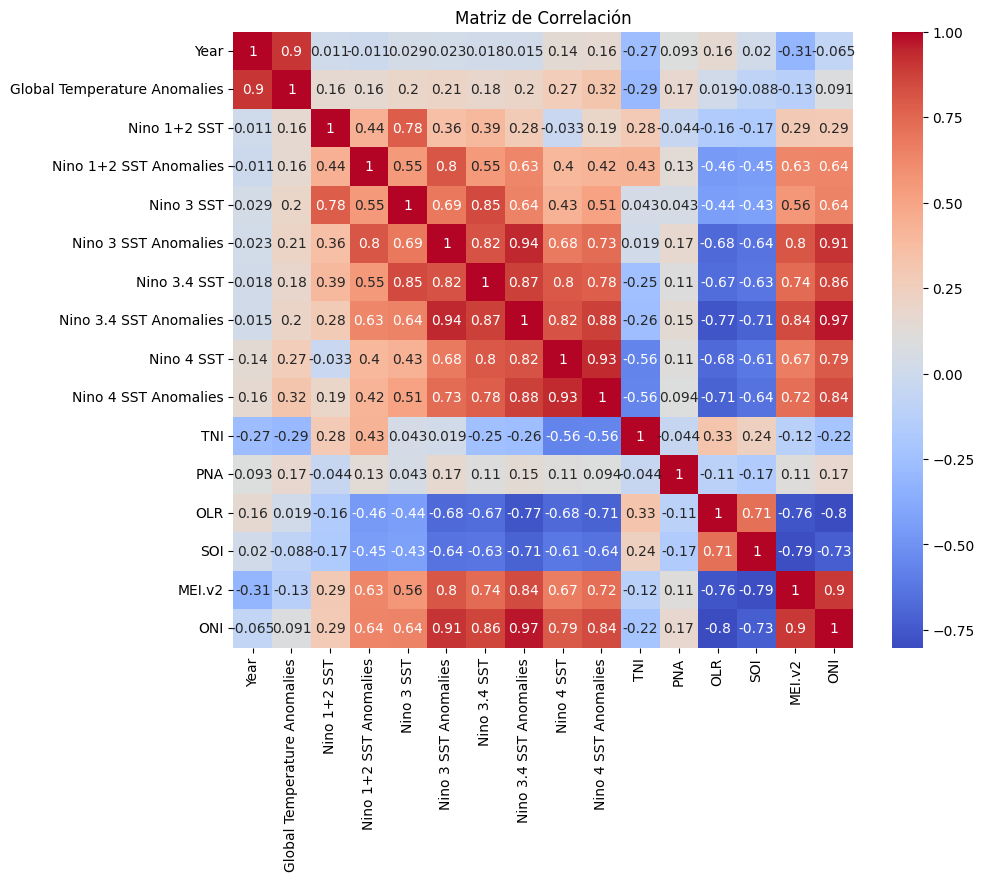

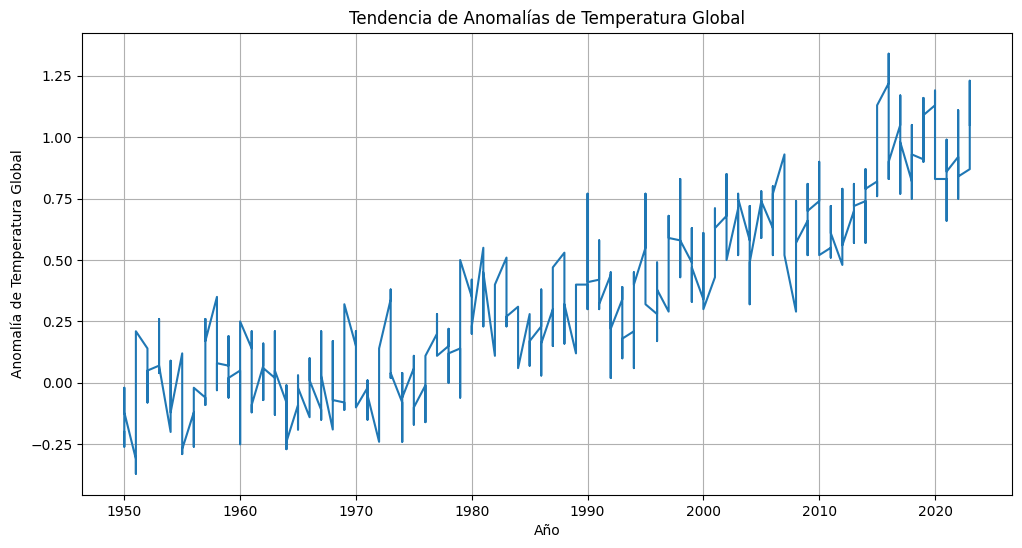

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


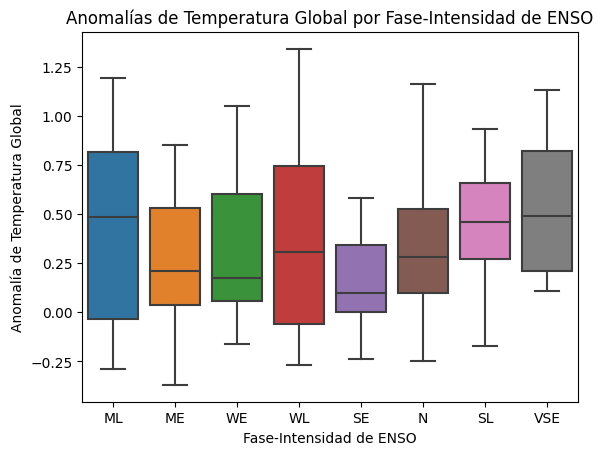

In [40]:
#Dataset tomando en cuenta los elementos vacíos, aún ya identificados

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("/Volumes/KINGSTON/Data Science Project/ENSO.csv")

#Matriz de Correlación (Solo en columnas numéricas)
numerical_columns = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

#Tendencias Temporales
plt.figure(figsize=(12, 6))
plt.plot(data["Year"], data["Global Temperature Anomalies"])
plt.title("Tendencia de Anomalías de Temperatura Global")
plt.xlabel("Año")
plt.ylabel("Anomalía de Temperatura Global")
plt.grid(True)
plt.show()

#Segmentación de Datos
sns.boxplot(x="ENSO Phase-Intensity", y="Global Temperature Anomalies", data=data)
plt.title("Anomalías de Temperatura Global por Fase-Intensidad de ENSO")
plt.xlabel("Fase-Intensidad de ENSO")
plt.ylabel("Anomalía de Temperatura Global")
plt.show()

Bien, con este segundo cuadro de código, se buscó crear gráficas adicionales que pudieran daros mejores resultados, y tenemos como resultado lo siguiente:
- Primero, la matriz de correlación, en donde se especifíca que se tomen en cuenta únicamente los valores numéricos, que es una restricción que podemos usar, pero nos damos cuenta que los valores son los mismos,el resultado es el mismo que en la anterior.
- Segundo, la gráfica de tendencias temporales, es interesante ver las formas en las que están distribuidos los datos, la información que nos da información sobre sus tendencias, en este caso, emos como existen valores ascendentes, descendentes y estables, sin embargo, hay desviaciones significativas que hacen que la gráfica se vea de esa manera, como sin sentido, pero realmente esa apreciadión de no tener sentido nos da mucha información de la variación del los valores a lo largo del tiempo.
- Tercero, el gráfico de cajas y bigotes, que nos muestra el comportamiento de los datos, con la finalidad de ver si hay datos "outliers" nuevamente, en lo que parece nuevamente que no, teniendo una segunda pista de la calidad de los datos.

## Se decide trabajar con el dataset 2, en el que se eliminaron los rows vacíos.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


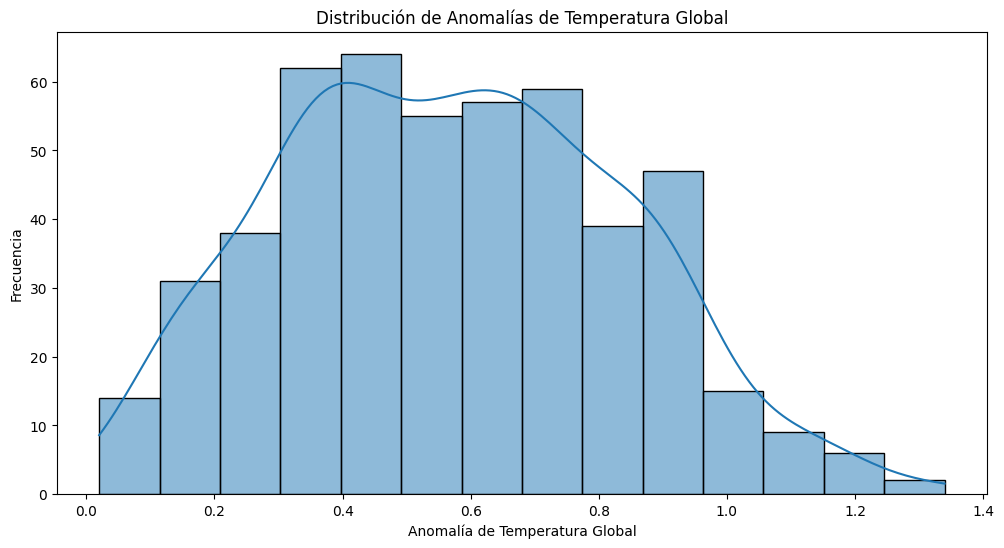

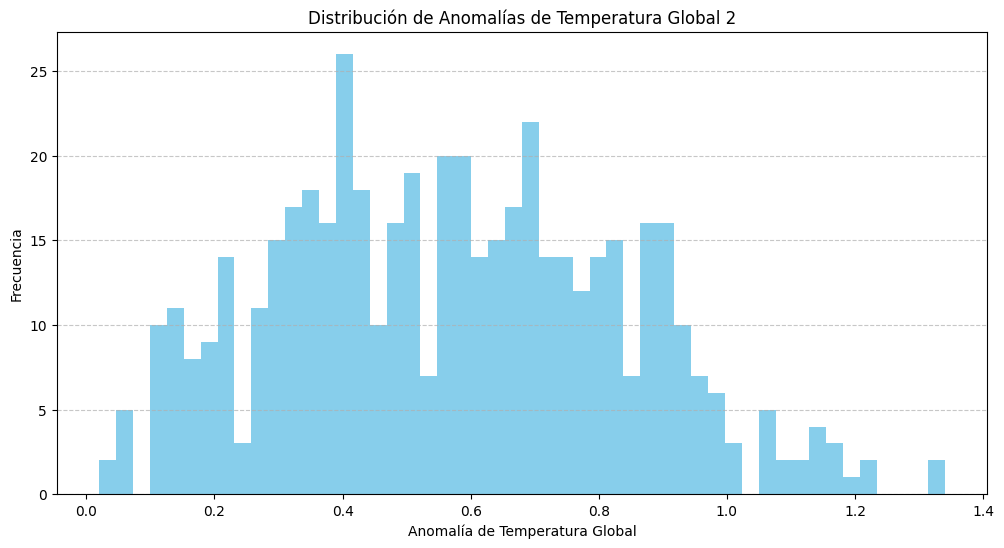

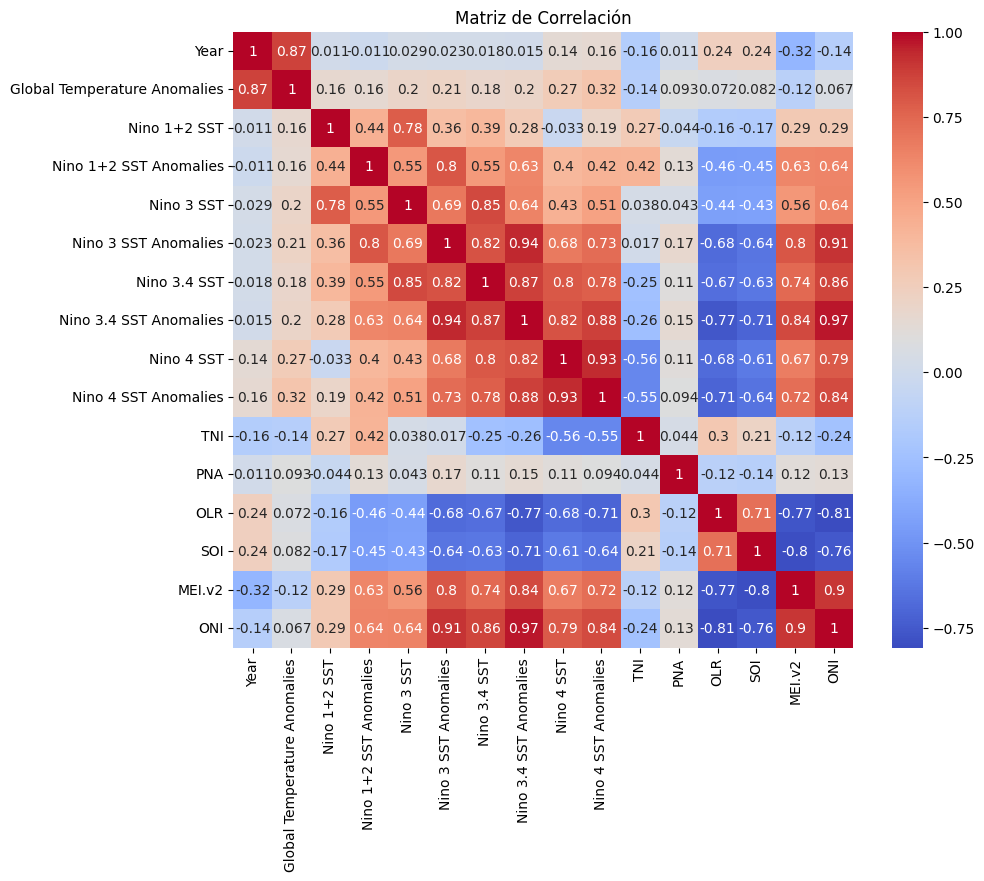

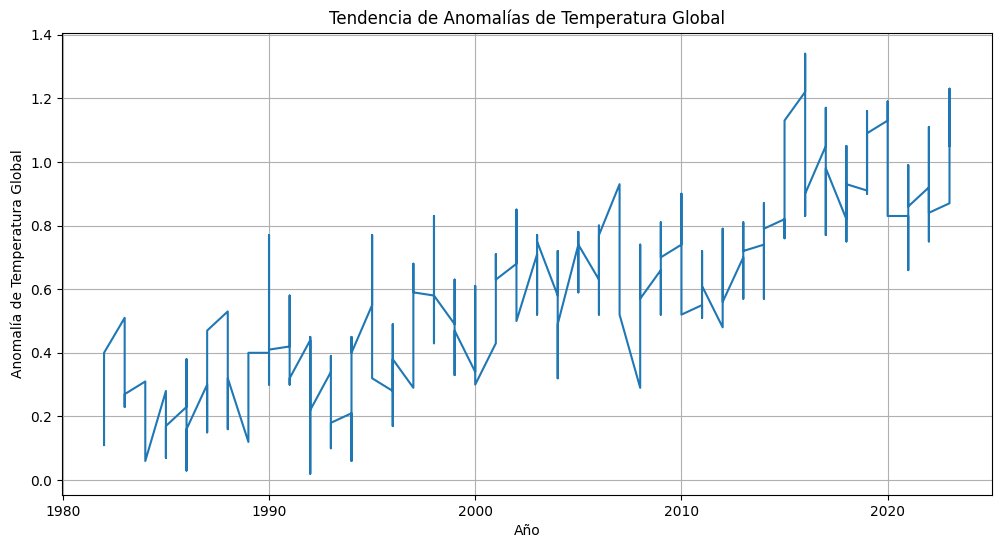

Datos faltantes por columna:
Date                            0
Year                            0
Month                           0
Global Temperature Anomalies    0
Nino 1+2 SST                    0
Nino 1+2 SST Anomalies          0
Nino 3 SST                      0
Nino 3 SST Anomalies            0
Nino 3.4 SST                    0
Nino 3.4 SST Anomalies          0
Nino 4 SST                      0
Nino 4 SST Anomalies            0
TNI                             0
PNA                             0
OLR                             5
SOI                             0
Season (2-Month)                0
MEI.v2                          0
Season (3-Month)                0
ONI                             0
Season (12-Month)               0
ENSO Phase-Intensity            6
dtype: int64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


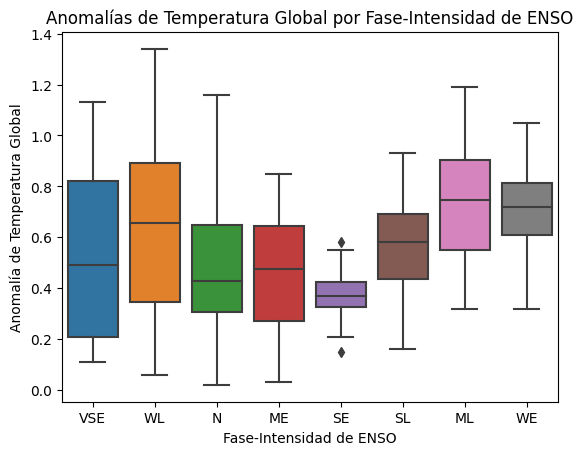

In [30]:
#Dataset con los elementos vacíos eliminados

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("/Volumes/KINGSTON/Data Science Project/El-Ni-o-Southern-Oscillation-ENSO-Analysis-main/enso_2.csv")

#Gráfica de barras
plt.figure(figsize=(12, 6))
sns.histplot(data["Global Temperature Anomalies"], kde=True)
plt.title("Distribución de Anomalías de Temperatura Global")
plt.xlabel("Anomalía de Temperatura Global")
plt.ylabel("Frecuencia")
plt.show()

#Histograma
plt.figure(figsize=(12, 6))
plt.hist(data["Global Temperature Anomalies"], bins=50, color='skyblue')
plt.title("Distribución de Anomalías de Temperatura Global 2")
plt.xlabel("Anomalía de Temperatura Global")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Matriz de Correlación (Solo en columnas numéricas)
numerical_columns = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

#Gráfica de Tendencias Temporales
plt.figure(figsize=(12, 6))
plt.plot(data["Year"], data["Global Temperature Anomalies"])
plt.title("Tendencia de Anomalías de Temperatura Global")
plt.xlabel("Año")
plt.ylabel("Anomalía de Temperatura Global")
plt.grid(True)
plt.show()

#Vemos Datos Faltantes
missing_data = data.isnull().sum()
print("Datos faltantes por columna:")
print(missing_data)

# Segmentación de Datos
sns.boxplot(x="ENSO Phase-Intensity", y="Global Temperature Anomalies", data=data)
plt.title("Anomalías de Temperatura Global por Fase-Intensidad de ENSO")
plt.xlabel("Fase-Intensidad de ENSO")
plt.ylabel("Anomalía de Temperatura Global")
plt.show()

En esta otra parte del código, como se mencionó en el código y antes del mismo, se decidió crear una copia del dataset y eliminarlos elementos vaciós, por lo que se crearon las mismas gráficas para ver el cambio que esto provocó:
- Uno, este a mi punto de vista fue uno de los cambios que se pueden notar a simple vista, ya que vemos como se eliminaron los datos negativos, y ya no muestra elementos antes del cero, ya son todos un poco más allá del 0, lo que nos lleva a intuir que esos elementos podrían ser causados por cálculos hechos con valores atípicos, es decir, por no tener valor en algún elemento, el cálculo daba negativo.
- Dos, en la matríz de correlación fue un poco más complejo por la cantidad de elementos que muestra, pero si hay cambio, el más notorio y el primero que se observa es la disminución de la correlación entre la variable años y la de "Global", igual hay más, pero por estár al inicio y la forma en la que apreciamos las visualizaciones de la punta izquierda hacia la derecha y bajando en forma de Z volviendo al inicio, es lo primero que se nota.
- Tres, la gráfica de tendencias temporas, se ve mejor, más grande pero sigue teniendo esa variación en sus elementos.
- Cuatro, a diferencia del dataset anterior, aquí solo quedaron 2 columnas con elementos faltantes, que no afectarán mucho en los cálculos.
- Cinco, vemos nuevamente si tenemos valores "outliers" con el gráfico de caja y nos damos cuenta que ya surgen en una columna, las demás se mantienen estables pero tenemos una distinta.

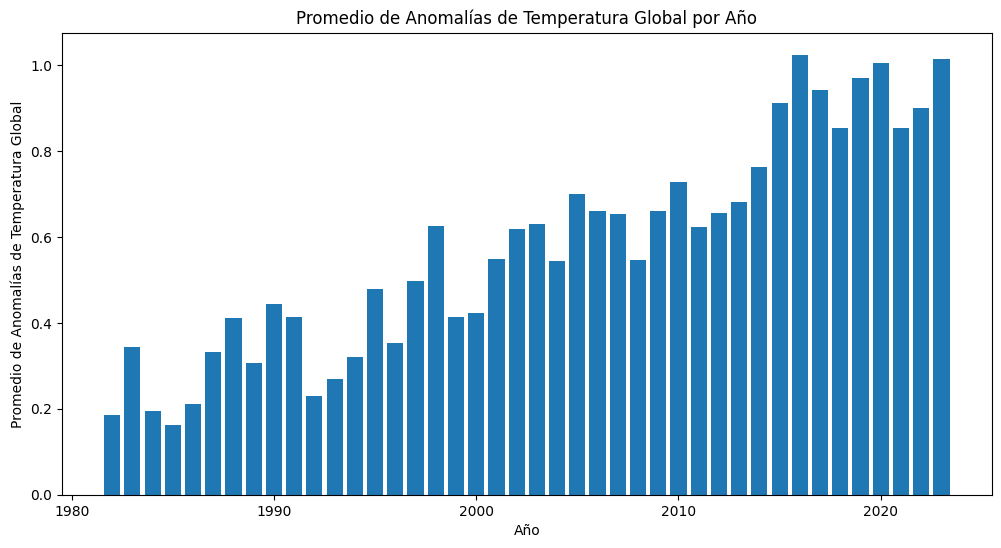

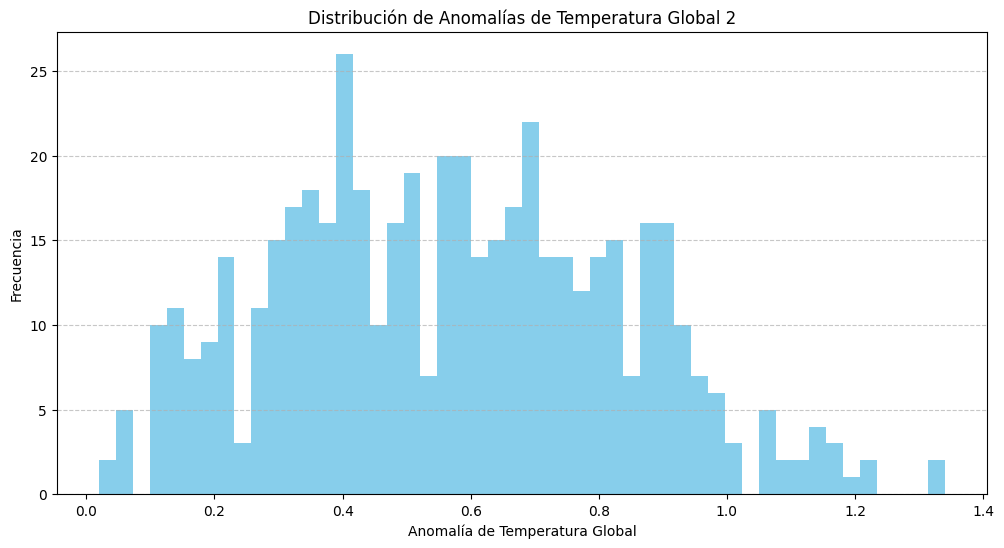

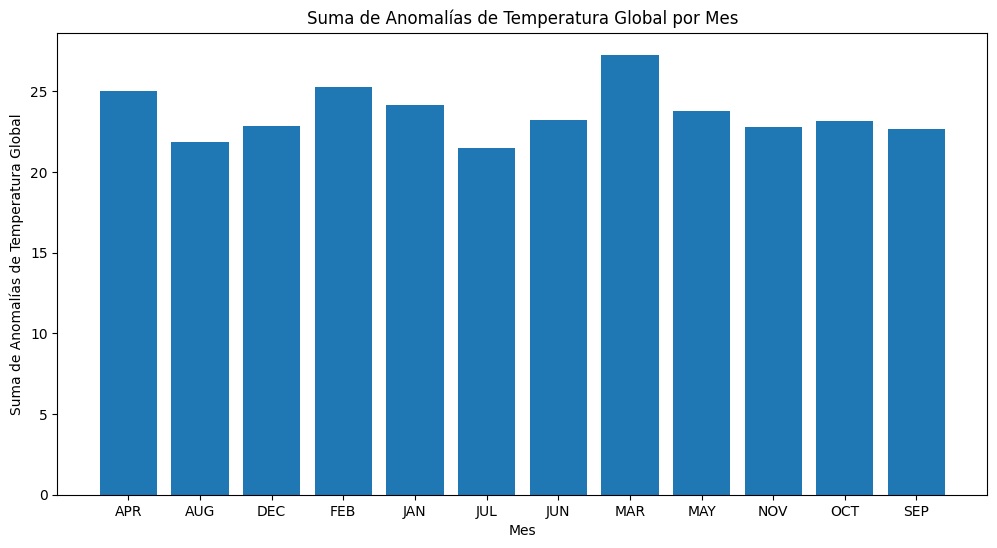

In [38]:
#Más gráficas

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/Volumes/KINGSTON/Data Science Project/El-Ni-o-Southern-Oscillation-ENSO-Analysis-main/enso_2.csv")

# Convertir la columna "Year" a tipo numérico
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

# Calcular el promedio de las anomalías de temperatura por año
promedio_anomalias_por_año = data.groupby('Year')['Global Temperature Anomalies'].mean()

# Crear una gráfica de barras para el promedio de anomalías por año
plt.figure(figsize=(12, 6))
plt.bar(promedio_anomalias_por_año.index, promedio_anomalias_por_año)
plt.xlabel('Año')
plt.ylabel('Promedio de Anomalías de Temperatura Global')
plt.title('Promedio de Anomalías de Temperatura Global por Año')
plt.show()

#Histograma
plt.figure(figsize=(12, 6))
plt.hist(data["Global Temperature Anomalies"], bins=50, color='skyblue')
plt.title("Distribución de Anomalías de Temperatura Global 2")
plt.xlabel("Anomalía de Temperatura Global")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calcular la suma de las anomalías de temperatura por mes
suma_anomalias_por_mes = data.groupby('Month')['Global Temperature Anomalies'].sum()

# Crear una gráfica de barras para la suma de anomalías por mes
plt.figure(figsize=(12, 6))
plt.bar(suma_anomalias_por_mes.index, suma_anomalias_por_mes)
plt.xlabel('Mes')
plt.ylabel('Suma de Anomalías de Temperatura Global')
plt.title('Suma de Anomalías de Temperatura Global por Mes')
plt.show()

En este otro bloque de código, podemos ver los siguientes resultados:
- La primera gráfica de barras nos da una comparativa de cada uno de los años, y vemos claramente el incremento que ha tenido, podemos tomarlo esto como el incrmento del comportamiento de las temperaturas, indícios del cambio climático.
- La segunda, es un histograma que nos muestra nuevamente como es la distribución de los datos, volvemos a concluir que son "normales".
- La tercera, es nuevamente un gráfico de barras, que nos da la comparativa del comportamiento de los meses en la misma variable de anomalías de temperatura global, donde vemos cuales son los meses más "afectados".

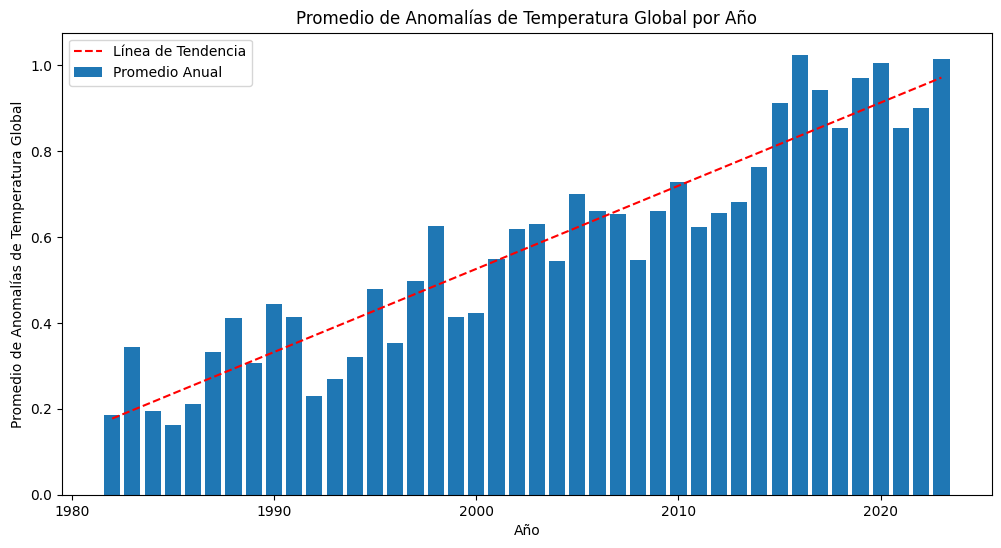

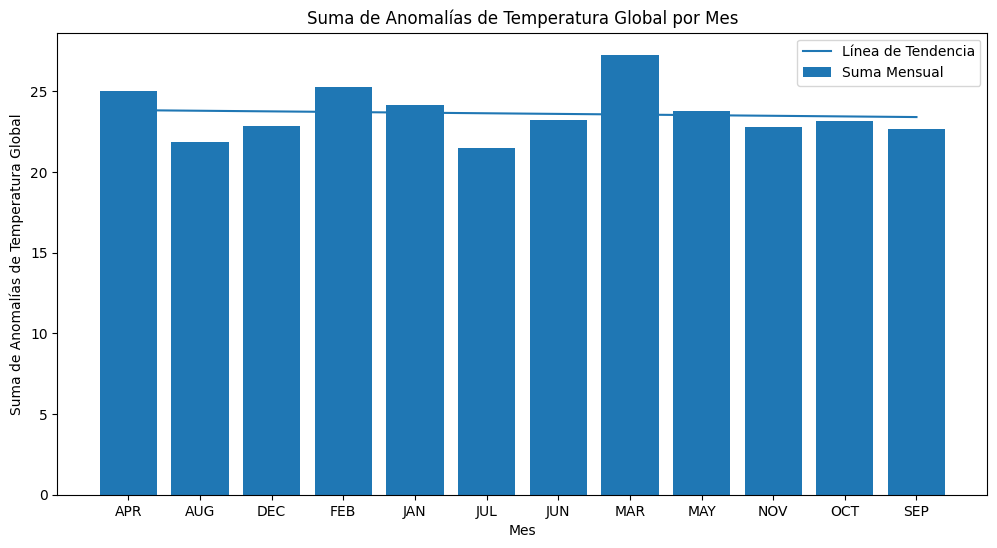

In [22]:
#Similar al gráfico anterior pero con la referencia de la línea de tendencia

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("/Volumes/KINGSTON/Data Science Project/El-Ni-o-Southern-Oscillation-ENSO-Analysis-main/enso_2.csv")

data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

promedio_anomalias_por_año = data.groupby('Year')['Global Temperature Anomalies'].mean()

plt.figure(figsize=(12, 6))
plt.bar(promedio_anomalias_por_año.index, promedio_anomalias_por_año, label='Promedio Anual')
plt.xlabel('Año')
plt.ylabel('Promedio de Anomalías de Temperatura Global')
plt.title('Promedio de Anomalías de Temperatura Global por Año')

#Se genera una línea de tendencia (regresión lineal) a los datos para el gráfico 1
z = np.polyfit(promedio_anomalias_por_año.index, promedio_anomalias_por_año, 1)
p = np.poly1d(z)
plt.plot(promedio_anomalias_por_año.index, p(promedio_anomalias_por_año.index), 'r--', label='Línea de Tendencia')
plt.legend(['Línea de Tendencia', 'Promedio Anual'])
plt.show()

suma_anomalias_por_mes = data.groupby('Month')['Global Temperature Anomalies'].sum()

plt.figure(figsize=(12, 6))
plt.bar(suma_anomalias_por_mes.index, suma_anomalias_por_mes, label='Suma Mensual')
plt.xlabel('Mes')
plt.ylabel('Suma de Anomalías de Temperatura Global')
plt.title('Suma de Anomalías de Temperatura Global por Mes')

#Se genera una línea de tendencia (regresión lineal) a los datos apra el gráfico 2
z = np.polyfit(range(len(suma_anomalias_por_mes)), suma_anomalias_por_mes, 1)
p = np.poly1d(z)
plt.plot(range(len(suma_anomalias_por_mes)), p(range(len(suma_anomalias_por_mes)))) #, 'r--')) #, label='Línea de Tendencia'))
plt.legend(['Línea de Tendencia', 'Suma Mensual'])
plt.show()

Bien, este otro bloque realmente es el mismo que el anterior, nos muestra dos de las tres gráficas anteriores,la diferencia es que tenemos una línea de tendencia que nos muestra cual es la tendencia que se tiene con los datos respecto al año y los meses, correspondientemente.
Y bueno, aunque no se tenía antes la línea, en la gráfica de año, podemos ver que la tendencia es ir en incremento.

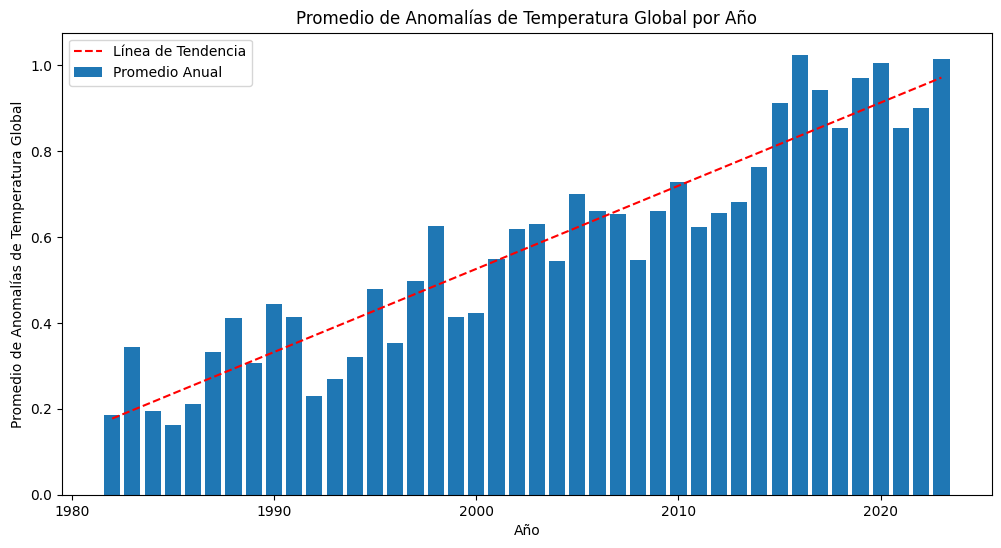

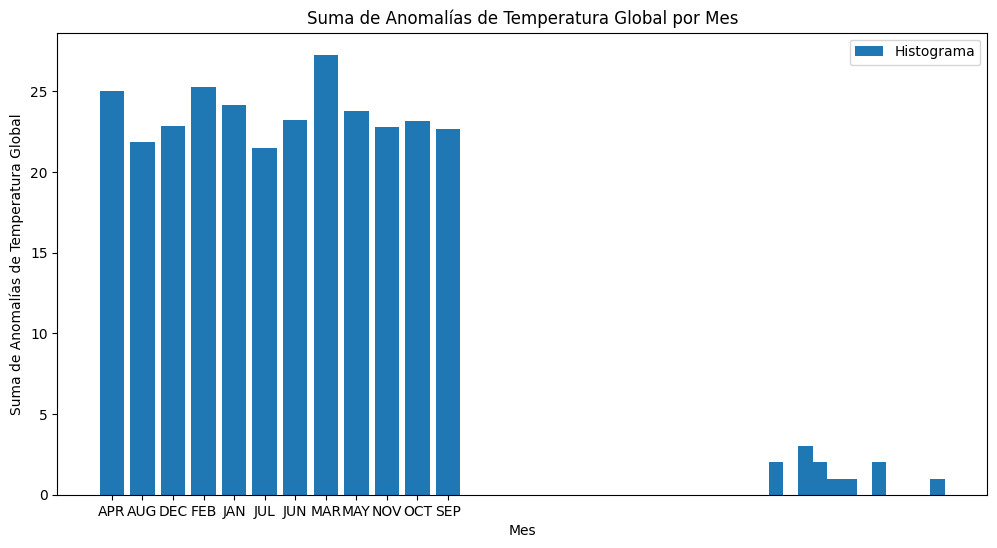

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("/Volumes/KINGSTON/Data Science Project/El-Ni-o-Southern-Oscillation-ENSO-Analysis-main/enso_2.csv")

data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

promedio_anomalias_por_año = data.groupby('Year')['Global Temperature Anomalies'].mean()

plt.figure(figsize=(12, 6))
plt.bar(promedio_anomalias_por_año.index, promedio_anomalias_por_año, label='Promedio Anual')
plt.xlabel('Año')
plt.ylabel('Promedio de Anomalías de Temperatura Global')
plt.title('Promedio de Anomalías de Temperatura Global por Año')

#Se genera una línea de tendencia (regresión lineal) a los datos para el gráfico 1
z = np.polyfit(promedio_anomalias_por_año.index, promedio_anomalias_por_año, 1)
p = np.poly1d(z)
plt.plot(promedio_anomalias_por_año.index, p(promedio_anomalias_por_año.index), 'r--', label='Línea de Tendencia')
plt.legend()
plt.show()

suma_anomalias_por_mes = data.groupby('Month')['Global Temperature Anomalies'].sum()

#Creamos una gráfica de barras paar la suma de anomalías por mes
plt.figure(figsize=(12, 6))
plt.bar(suma_anomalias_por_mes.index, suma_anomalias_por_mes, label='Suma Mensual')
plt.xlabel('Mes')
plt.ylabel('Suma de Anomalías de Temperatura Global')
plt.title('Suma de Anomalías de Temperatura Global por Mes')

#Histograma
plt.hist(suma_anomalias_por_mes, bins=len(suma_anomalias_por_mes))
plt.legend(['Histograma'])
plt.show()

Este otro bloque de código se dejó como muestra de las veces que se intentó realizar adecuaciones a los gráficos, están mal hechas pero no siempre salen correctas, así que se dejó por ese motivo, aunque no expliquen nada.

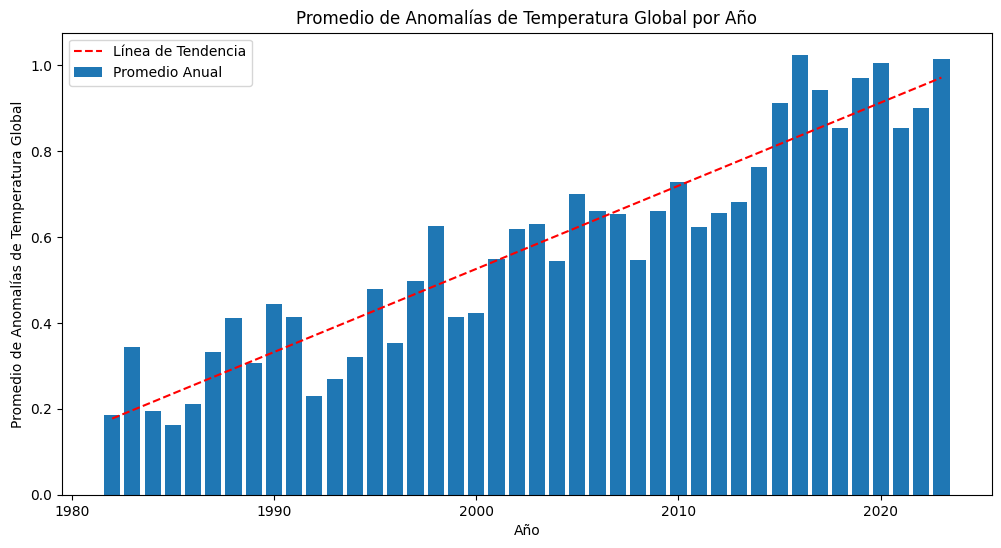

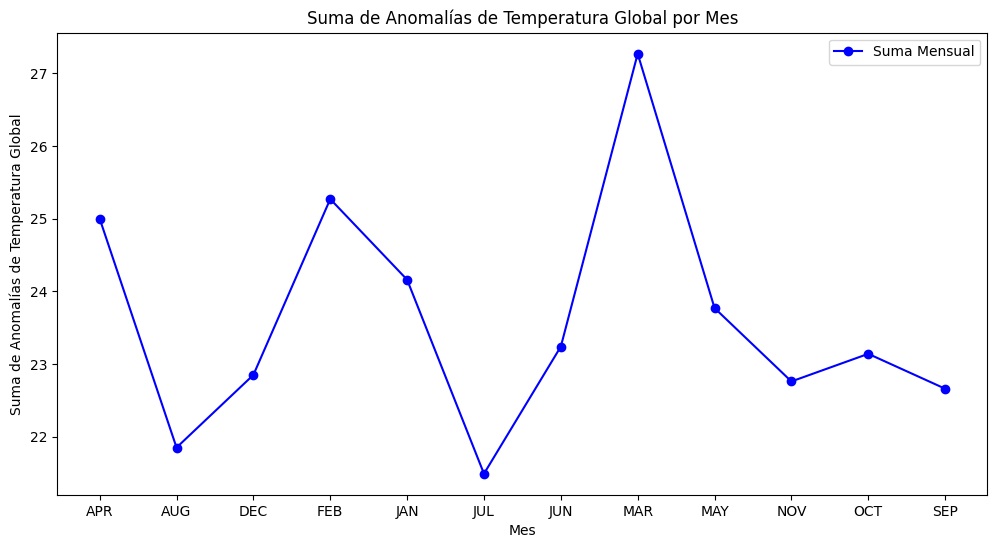

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("/Volumes/KINGSTON/Data Science Project/El-Ni-o-Southern-Oscillation-ENSO-Analysis-main/enso_2.csv")

data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

promedio_anomalias_por_año = data.groupby('Year')['Global Temperature Anomalies'].mean()

plt.figure(figsize=(12, 6))
plt.bar(promedio_anomalias_por_año.index, promedio_anomalias_por_año, label='Promedio Anual')
plt.xlabel('Año')
plt.ylabel('Promedio de Anomalías de Temperatura Global')
plt.title('Promedio de Anomalías de Temperatura Global por Año')

z = np.polyfit(promedio_anomalias_por_año.index, promedio_anomalias_por_año, 1)
p = np.poly1d(z)
plt.plot(promedio_anomalias_por_año.index, p(promedio_anomalias_por_año.index), 'r--', label='Línea de Tendencia')
plt.legend()
plt.show()

suma_anomalias_por_mes = data.groupby('Month')['Global Temperature Anomalies'].sum()

#Cambiamos a un gráfico de líneas, que muestrará la suma de anomalías por mes
plt.figure(figsize=(12, 6))
plt.plot(suma_anomalias_por_mes.index, suma_anomalias_por_mes, 'b-o', label='Suma Mensual')
plt.xlabel('Mes')
plt.ylabel('Suma de Anomalías de Temperatura Global')
plt.title('Suma de Anomalías de Temperatura Global por Mes')
plt.legend()
plt.show()

En este siguiente bloque cambiamos de una gráfica de barras para los meses a una gráfica de líneas, que puede mostrarnos un resultado un poco diferente, pero al final de cuenta nos muestra el comportamiento que se tiene de la columna de estúdio con respecto al tiempo, en este caso, de los meses.

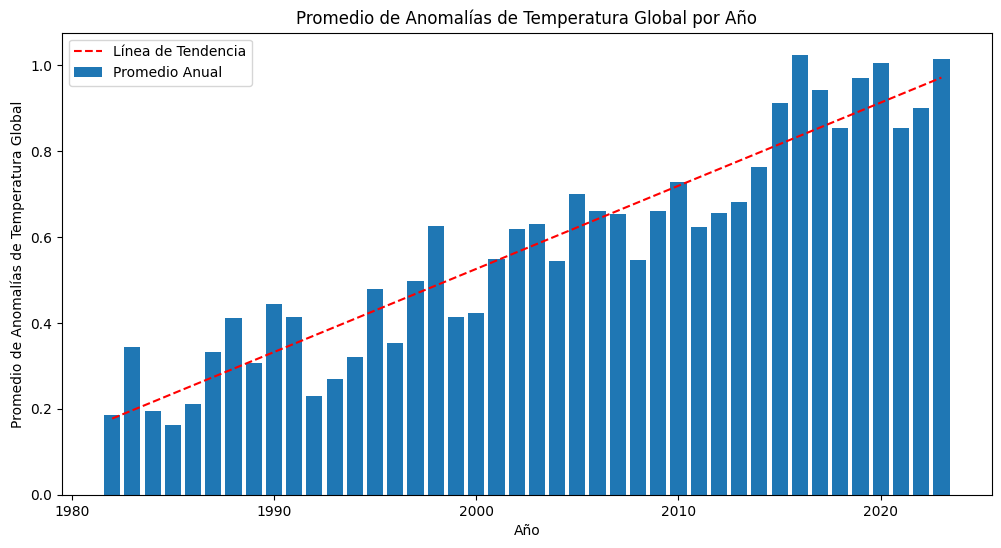

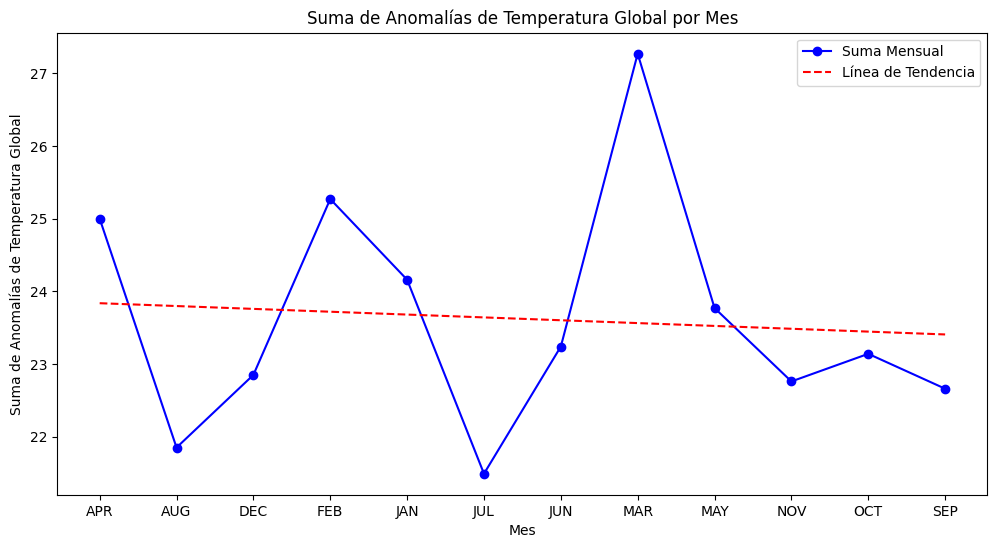

In [19]:
#Muestra los meses en orden alfabético (gráfica 2)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("/Volumes/KINGSTON/Data Science Project/El-Ni-o-Southern-Oscillation-ENSO-Analysis-main/enso_2.csv")

data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

promedio_anomalias_por_año = data.groupby('Year')['Global Temperature Anomalies'].mean()

plt.figure(figsize=(12, 6))
plt.bar(promedio_anomalias_por_año.index, promedio_anomalias_por_año, label='Promedio Anual')
plt.xlabel('Año')
plt.ylabel('Promedio de Anomalías de Temperatura Global')
plt.title('Promedio de Anomalías de Temperatura Global por Año')

z = np.polyfit(promedio_anomalias_por_año.index, promedio_anomalias_por_año, 1)
p = np.poly1d(z)
plt.plot(promedio_anomalias_por_año.index, p(promedio_anomalias_por_año.index), 'r--', label='Línea de Tendencia')
plt.legend()
plt.show()

suma_anomalias_por_mes = data.groupby('Month')['Global Temperature Anomalies'].sum()

plt.figure(figsize=(12, 6))
plt.plot(suma_anomalias_por_mes.index, suma_anomalias_por_mes, 'b-o', label='Suma Mensual')
plt.xlabel('Mes')
plt.ylabel('Suma de Anomalías de Temperatura Global')
plt.title('Suma de Anomalías de Temperatura Global por Mes')

# Ajustar una línea de tendencia (regresión lineal) a los datos
z = np.polyfit(range(len(suma_anomalias_por_mes)), suma_anomalias_por_mes, 1)
p = np.poly1d(z)
trend_line = p(range(len(suma_anomalias_por_mes)))
plt.plot(range(len(suma_anomalias_por_mes)), trend_line, 'r--', label='Línea de Tendencia')
plt.legend()
plt.show()

Este otro bloque es el mismo que el anterior, pero se añadió una línea de tendencia en la gráfia de línea, pero, si nos damos cuenta, el acomodo de los meses es por orden alfabético, lo que eso confunde un poco el resultado, en el siguiente se tendrá que realizar una modificación.

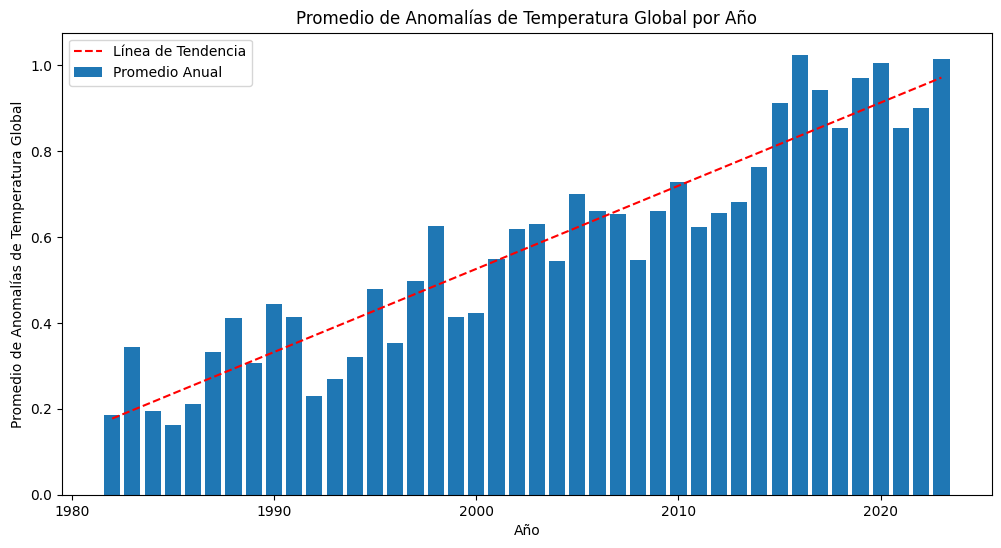

/var/folders/f5/7p5qbfcx0dlg0t_k8kl9m06w0000gn/T/ipykernel_952/3838263169.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  suma_anomalias_por_mes = data.groupby('Month')['Global Temperature Anomalies'].sum()


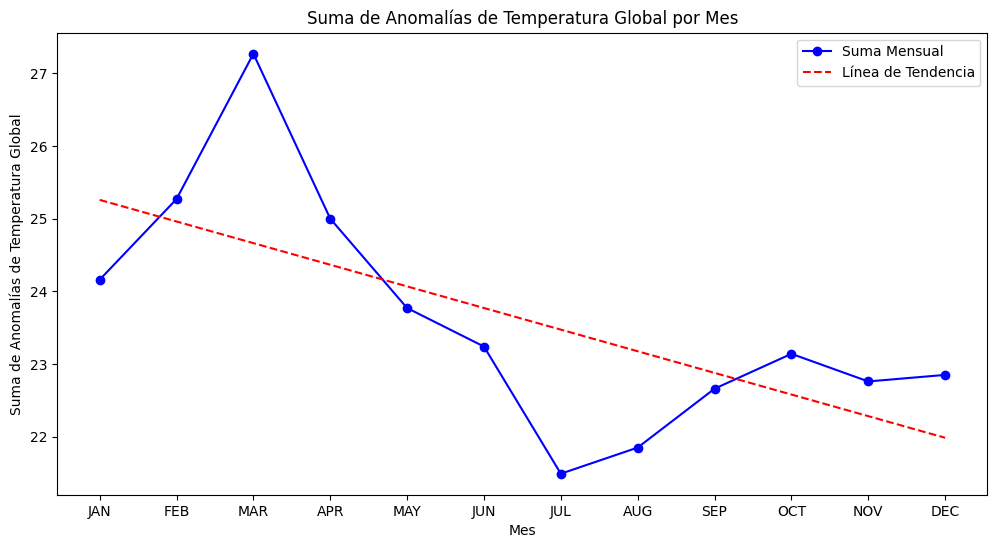

In [20]:
#Muestra los meses como están en el año, no en orden alfabético (gráfica 2)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("/Volumes/KINGSTON/Data Science Project/El-Ni-o-Southern-Oscillation-ENSO-Analysis-main/enso_2.csv")

data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

#DEfinimos el órden de los meses
order_meses = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]

#Le damos el orden de los meses a la columna "Month"
data['Month'] = pd.Categorical(data['Month'], categories=order_meses, ordered=True)

promedio_anomalias_por_año = data.groupby('Year')['Global Temperature Anomalies'].mean()

plt.figure(figsize=(12, 6))
plt.bar(promedio_anomalias_por_año.index, promedio_anomalias_por_año, label='Promedio Anual')
plt.xlabel('Año')
plt.ylabel('Promedio de Anomalías de Temperatura Global')
plt.title('Promedio de Anomalías de Temperatura Global por Año')

z = np.polyfit(promedio_anomalias_por_año.index, promedio_anomalias_por_año, 1)
p = np.poly1d(z)
plt.plot(promedio_anomalias_por_año.index, p(promedio_anomalias_por_año.index), 'r--', label='Línea de Tendencia')
plt.legend()
plt.show()

suma_anomalias_por_mes = data.groupby('Month')['Global Temperature Anomalies'].sum()

plt.figure(figsize=(12, 6))
plt.plot(order_meses, suma_anomalias_por_mes, 'b-o', label='Suma Mensual')
plt.xlabel('Mes')
plt.ylabel('Suma de Anomalías de Temperatura Global')
plt.title('Suma de Anomalías de Temperatura Global por Mes')

#Ajustamos la línea de tendencia (regresión lineal) a los datos ordenados
z = np.polyfit(range(len(suma_anomalias_por_mes)), suma_anomalias_por_mes, 1)
p = np.poly1d(z)
trend_line = p(range(len(suma_anomalias_por_mes)))
plt.plot(range(len(suma_anomalias_por_mes)), trend_line, 'r--', label='Línea de Tendencia')
plt.legend()
plt.show()


Por último, vemos el resultado del orden que se dio a como los meses están realmente en el año, y si hay una diferencia significativa en el comportamiento de los resultados, vemos cuales son los meses más afectados y como es que cae la línea de tendencia. Interesante reslultado.